In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
print('max_rows:' , pd.options.display.max_rows)
print('max_columns:' , pd.options.display.max_columns)
%matplotlib inline 
movie = pd.read_csv("C:/Users/KIIT/Downloads/archive (1)/movies.csv") # reads the csv and creates the dataframe called movie
movie.head()
movie.info()

max_rows: 60
max_columns: 999
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   imdbId            4168 non-null   int64  
 1   Imdb Link         4168 non-null   object 
 2   Title             4168 non-null   object 
 3   IMDB Score        4167 non-null   float64
 4   Genre             4168 non-null   object 
 5   local_image_path  4168 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 195.5+ KB


In [2]:
movie.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,local_image_path
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation;Adventure;Comedy,images/114709_.jpg
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action;Adventure;Family,images/113497_.jpg
2,113277,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action;Crime;Drama,images/113277_.jpg
3,114319,http://www.imdb.com/title/tt114319,Sabrina (1995),6.3,Comedy;Drama,images/114319_.jpg
4,114576,http://www.imdb.com/title/tt114576,Sudden Death (1995),5.7,Action;Crime;Thriller,images/114576_.jpg


In [28]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

# Install necessary dependencies
!pip install tensorflow
!pip install keras
!pip install pillow

In [6]:
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import os

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to resize an image based on VGG16 input size
def resize_image(image, target_size=(224, 224)):
    img = image.resize(target_size)
    return img

# Function to extract features from an image using the VGG16 model
def extract_features(image_path):
    img = Image.open(image_path)  # Open the image using PIL
    img = img.convert('RGB')  # Convert the image to RGB (if it's grayscale)
    img = resize_image(img)  # Resize the image
    x = image.img_to_array(img)  # Convert image to array
    x = np.expand_dims(x, axis=0)  # Add an extra dimension to match VGG16 input shape
    x = preprocess_input(x)  # Preprocess the input (e.g., normalization)

    features = model.predict(x)  # Extract features using VGG16

    return features.flatten()  # Flatten the features to a 1D array


# Load the movie data including IMDb ID, link, local image path, and other attributes
data = pd.read_csv("C:/Users/KIIT/Downloads/archive (1)/movies.csv")  # Replace with the actual path to your movie data CSV file

# Specify the path to the image folder
image_folder = "C:/Users/KIIT/Downloads/archive (1)/images/images" # Replace with the path to your image folder

duplicate_imdb_ids = data['imdbId'].duplicated()
print("Number of duplicate IMDb IDs:", duplicate_imdb_ids.sum())
data = data.drop_duplicates(subset='imdbId', keep='first')

# Extract visual features for each image and store in a list
visual_features = None  # Initialize as None
missing_images = []

for index, row in data.iterrows():
    imdb_id = str(row['imdbId'])  # Convert the IMDb ID to a string
    image_filename = imdb_id + '_.jpg'  # Append the underscore and the file extension to the IMDb ID
    image_path = os.path.join(image_folder, image_filename)  # Concatenate the image folder path with the modified image filename
    image_path = os.path.normpath(image_path)  # Normalize the path for OS compatibility
    
    print(f"Processing image: {image_filename}")

    if os.path.exists(image_path):
        features = extract_features(image_path)
        if visual_features is None:
            visual_features = features.reshape(1, -1)
        else:
            features = features.reshape(1, -1)
            visual_features = np.concatenate((visual_features, features), axis=0)
        print("Features extracted successfully.")
    else:
        missing_images.append(image_path)
        print("Image not found.")

    print("")

# Convert the list of missing images to a DataFrame
missing_images_df = pd.DataFrame(missing_images, columns=['image_path'])

# Merge the missing images DataFrame with the original data using IMDB ID as the key
combined_data = pd.merge(data, missing_images_df, left_on='imdbId', right_index=True, how='left')



image_folder = 'C:/Users/KIIT/Downloads/archive (1)/images/images/'  # Replace with the base folder path

# Update the image path column
combined_data['image_path'] = image_folder + combined_data['image_path']


# Print the combined data
print(combined_data)


Number of duplicate IMDb IDs: 97
Processing image: 114709_.jpg
1/1 [==============================] - 0s 397ms/step
Features extracted successfully.

Processing image: 113497_.jpg
1/1 [==============================] - 0s 153ms/step
Features extracted successfully.

Processing image: 113277_.jpg
1/1 [==============================] - 0s 159ms/step
Features extracted successfully.

Processing image: 114319_.jpg
1/1 [==============================] - 0s 242ms/step
Features extracted successfully.

Processing image: 114576_.jpg
1/1 [==============================] - 0s 177ms/step
Features extracted successfully.

Processing image: 113189_.jpg
1/1 [==============================] - 0s 142ms/step
Features extracted successfully.

Processing image: 112346_.jpg
1/1 [==============================] - 0s 153ms/step
Features extracted successfully.

Processing image: 112896_.jpg
1/1 [==============================] - 0s 190ms/step
Features extracted successfully.

Processing image: 113987_.jpg
1

In [2]:
from sklearn.model_selection import train_test_split

# Assuming you have a dataframe named 'data' containing your movie recommendation dataset

# Split the data into features (X) and target (y)
X = data.drop('IMDB Score', axis=1)  # Replace 'target_column' with the actual column name of your target variable
y = data['IMDB Score']

# Split the data into training and temporary sets (80% training, 20% temporary)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into training and validation sets (60% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2442, 5) (2442,)
Validation set shape: (814, 5) (814,)
Testing set shape: (815, 5) (815,)


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# Extract the movie titles and their corresponding feature vectors
movie_titles = combined_data['Title']  # Replace with the correct column name for movie titles
feature_vectors = visual_features  # Replace with the extracted visual features

# Calculate similarity scores between the movies using feature vectors
similarity_scores = cosine_similarity(feature_vectors)

# Function to calculate similarity scores between two feature vectors
def calculate_similarity(feature_vector1, feature_vector2):
    return cosine_similarity([feature_vector1], [feature_vector2])[0][0]

# Function to recommend movies based on a target movie title
def recommend_movies(target_title, top_n=5):
    # Find the index of the target movie title
    target_index = movie_titles[movie_titles == target_title].index[0]
    
    # Get the similarity scores of the target movie with all other movies
    target_similarity_scores = similarity_scores[target_index]
    
    # Sort the movies based on similarity scores
    sorted_indices = np.argsort(target_similarity_scores)[::-1]  # Sort in descending order
    
    # Get the top-N recommended movies
    recommended_movies = combined_data.loc[sorted_indices[1:top_n+1]]
    
    return recommended_movies

# Function to recommend movies based on genre and score similarity
def recommend_movies_genre_score(target_genre, target_score, top_n=5):
    # Filter movies based on target genre and score
    filtered_movies = combined_data[(combined_data['Genre'] == target_genre) & (combined_data['IMDB Score'] >= target_score)]
    
    # Sort movies based on IMDB Score
    sorted_movies = filtered_movies.sort_values(by='IMDB Score', ascending=False)
    
    # Get the top-N recommended movies
    recommended_movies = sorted_movies.head(top_n)
    
    return recommended_movies

# Example usage
target_movie_title = 'Pinocchio (1940)'  # Replace with the target movie title
recommended_movies_visual = recommend_movies(target_movie_title)
recommended_movies_genre_score = recommend_movies_genre_score('Animation;Comedy;Family', 7.0)

# Print the recommended movies
print("Recommended movies based on visual similarity:")
print(recommended_movies_visual)
print()
print("Recommended movies based on genre and score similarity:")
print(recommended_movies_genre_score)


Recommended movies based on visual similarity:
      imdbId                           Imdb Link  \
250    33563   http://www.imdb.com/title/tt33563   
252    43274   http://www.imdb.com/title/tt43274   
1253   40068   http://www.imdb.com/title/tt40068   
0     114709  http://www.imdb.com/title/tt114709   
828    44121   http://www.imdb.com/title/tt44121   

                                             Title  IMDB Score  \
250                                   Dumbo (1941)         7.3   
252                     Alice in Wonderland (1951)         7.4   
1253  Abbott and Costello Meet Frankenstein (1948)         7.6   
0                                 Toy Story (1995)         8.3   
828            The Thing from Another World (1951)         7.3   

                           Genre    local_image_path image_path  
250       Animation;Drama;Family   images/33563_.jpg        NaN  
252   Animation;Adventure;Family   images/43274_.jpg        NaN  
1253       Comedy;Fantasy;Horror   images/400

Recommended movies based on visual similarity:


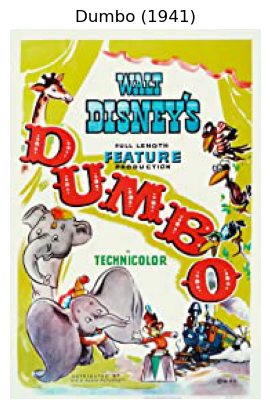

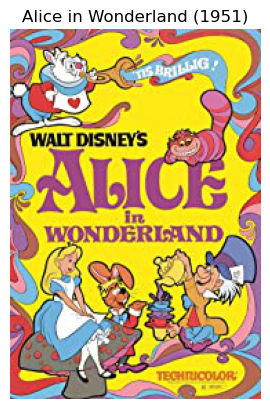

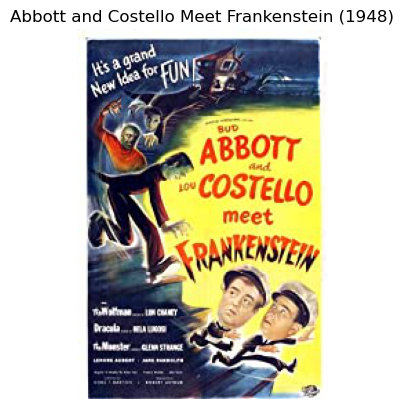

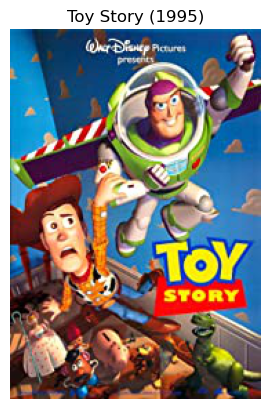

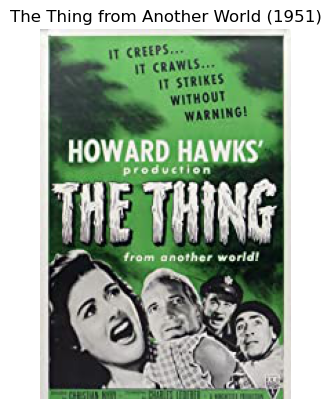


Recommended movies based on genre and score similarity:


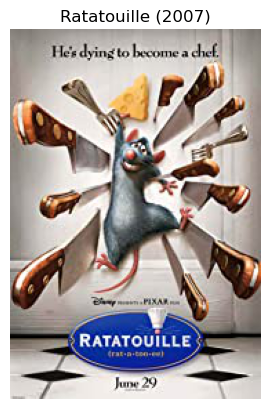

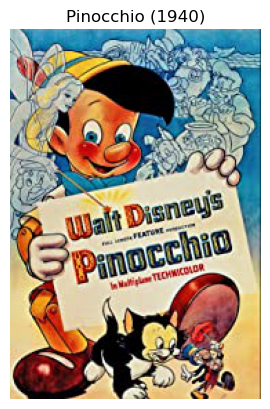

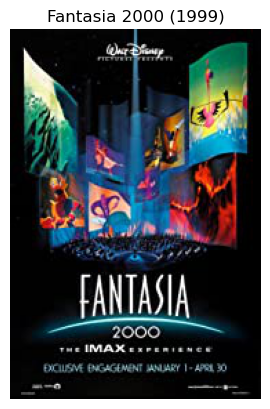

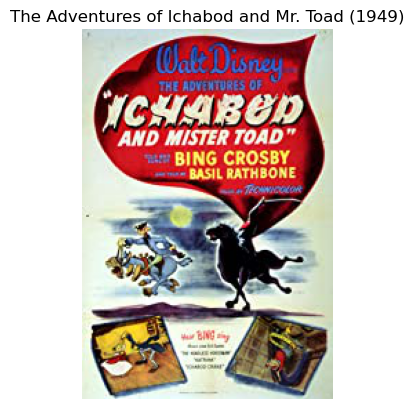

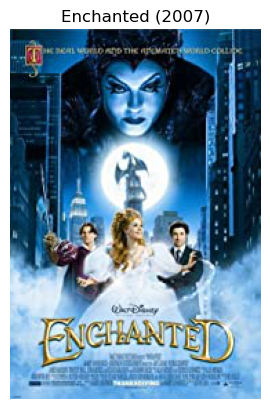

In [4]:
# Function to recommend movies based on a target movie title
def recommend_movies(target_title, top_n=5):
    # Find the index of the target movie title
    target_index = movie_titles[movie_titles == target_title].index[0]
    
    # Calculate similarity scores between the target movie and all other movies
    similarity_scores = [calculate_similarity(feature_vectors[target_index], feature_vector) for feature_vector in feature_vectors]
    
    # Sort the movies based on similarity scores
    sorted_indices = np.argsort(similarity_scores)[::-1]  # Sort in descending order
    
    # Get the top-N recommended movies
    recommended_movies = combined_data.loc[sorted_indices[1:top_n+1]]
    
    return recommended_movies

# Function to recommend movies based on genre and score similarity
def recommend_movies_genre_score(target_genre, target_score, top_n=5):
    # Filter movies based on target genre and score
    filtered_movies = combined_data[(combined_data['Genre'] == target_genre) & (combined_data['IMDB Score'] >= target_score)]
    
    # Sort movies based on IMDB Score
    sorted_movies = filtered_movies.sort_values(by='IMDB Score', ascending=False)
    
    # Get the top-N recommended movies
    recommended_movies = sorted_movies.head(top_n)
    
    return recommended_movies

# Function to display the images of recommended movies
def display_movie_images(movie_data):
    for index, row in movie_data.iterrows():
        image_path = row['image_path']
        title = row['Title']
        
        # Load and display the image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()

# Example usage
target_movie_title = 'Pinocchio (1940)'  # Replace with the target movie title
recommended_movies_visual = recommend_movies(target_movie_title)
recommended_movies_genre_score = recommend_movies_genre_score('Animation;Comedy;Family', 7.0)
from PIL import Image
import matplotlib.pyplot as plt

import os

# Specify the path to the image folder
image_folder = "C:/Users/KIIT/Downloads/archive (1)/images"  # Replace with the path to your image folder

# Function to display movie images
def display_movie_images(movie_data):
    # Iterate over each movie in the data
    for _, row in movie_data.iterrows():
        title = row['Title']  # Replace 'Title' with the correct column name for movie titles
        image_filename = row['local_image_path']  # Replace 'local_image_path' with the correct column name for image paths

        # Construct the complete path to the image
        image_path = os.path.join(image_folder, image_filename)

        # Load and display the image
        try:
            img = Image.open(image_path)
            plt.imshow(img)
            plt.title(title)
            plt.axis('off')
            plt.show()
        except:
            print(f"Skipping movie: {title} (Invalid image path)")
            
            # Display the images of recommended movies
print("Recommended movies based on visual similarity:")
display_movie_images(recommended_movies_visual)
print()
print("Recommended movies based on genre and score similarity:")
display_movie_images(recommended_movies_genre_score)



Enter the movie title: Pinocchio (1940)
Recommended movies based on visual similarity:


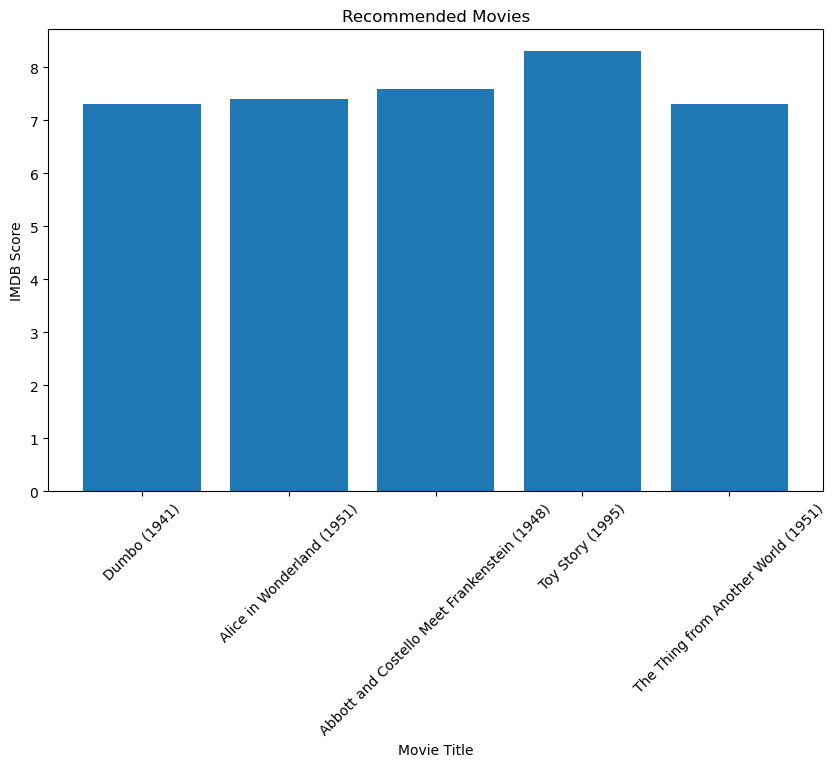


Recommended movies based on genre and score similarity:


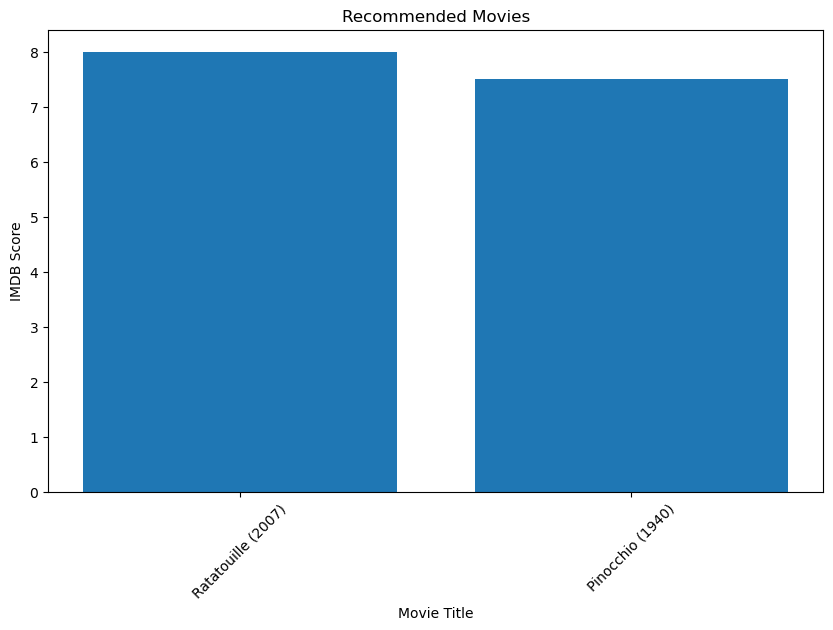

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to the image folder
image_folder = "C:/Users/KIIT/Downloads/archive (1)/images"  # Replace with the path to your image folder

# Function to recommend movies based on a target movie title
def recommend_movies(target_title, top_n=5):
    # Find the index of the target movie title
    target_index = combined_data[combined_data['Title'] == target_title].index[0]

    # Calculate similarity scores between the target movie and all other movies
    similarity_scores = [calculate_similarity(feature_vectors[target_index], feature_vector) for feature_vector in feature_vectors]

    # Sort the movies based on similarity scores
    sorted_indices = np.argsort(similarity_scores)[::-1]  # Sort in descending order

    # Get the top-N recommended movies based on visual similarity
    recommended_movies_visual = combined_data.loc[sorted_indices[1:top_n+1]]

    # Filter movies based on target genre and score
    target_genre = combined_data.loc[target_index, 'Genre']
    target_score = combined_data.loc[target_index, 'IMDB Score']
    recommended_movies_genre_score = combined_data[(combined_data['Genre'] == target_genre) & (combined_data['IMDB Score'] >= target_score)]

    # Sort movies based on IMDB Score
    recommended_movies_genre_score = recommended_movies_genre_score.sort_values(by='IMDB Score', ascending=False)

    # Get the top-N recommended movies based on genre and score similarity
    recommended_movies_genre_score = recommended_movies_genre_score.head(top_n)

    return recommended_movies_visual, recommended_movies_genre_score

# Function to display the result graph
def display_result_graph(recommended_movies):
    # Extract the movie titles and their corresponding scores
    movie_titles = recommended_movies['Title']
    movie_scores = recommended_movies['IMDB Score']

    # Create a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(movie_titles, movie_scores)
    plt.xticks(rotation=45)
    plt.xlabel('Movie Title')
    plt.ylabel('IMDB Score')
    plt.title('Recommended Movies')

    # Display the graph
    plt.show()

# Function to display movie images
def display_movie_images(movie_data):
    # Iterate over each movie in the data
    for _, row in movie_data.iterrows():
        title = row['Title']
        image_filename = row['local_image_path']

        # Construct the complete path to the image
        image_path = os.path.join(image_folder, image_filename)

        # Load and display the image
        try:
            img = Image.open(image_path)
            plt.imshow(img)
            plt.title(title)
            plt.axis('off')
            plt.show()
        except:
            print(f"Skipping movie: {title} (Invalid image path)")

# Get user input for the target movie title
target_movie_title = input("Enter the movie title: ")

# Recommend movies based on the user input
recommended_movies_visual, recommended_movies_genre_score = recommend_movies(target_movie_title)

# Display the result graph for recommended movies based on visual similarity
print("Recommended movies based on visual similarity:")
display_result_graph(recommended_movies_visual)
print()

# Display the result graph for recommended movies based on genre and score similarity
print("Recommended movies based on genre and score similarity:")
display_result_graph(recommended_movies_genre_score)


In [7]:
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to resize an image based on VGG16 input size
def resize_image(image, target_size=(224, 224)):
    img = image.resize(target_size)
    return img

# Function to extract features from an image using the VGG16 model
def extract_features(image_path):
    img = Image.open(image_path)  # Open the image using PIL
    img = img.convert('RGB')  # Convert the image to RGB (if it's grayscale)
    img = resize_image(img)  # Resize the image
    x = image.img_to_array(img)  # Convert image to array
    x = np.expand_dims(x, axis=0)  # Add an extra dimension to match VGG16 input shape
    x = preprocess_input(x)  # Preprocess the input (e.g., normalization)

    features = model.predict(x)  # Extract features using VGG16

    return features.flatten()  # Flatten the features to a 1D array


# Load the movie data including IMDb ID, link, local image path, and other attributes
data = pd.read_csv("C:/Users/KIIT/Downloads/archive (1)/movies.csv")  # Replace with the actual path to your movie data CSV file

# Specify the path to the image folder
image_folder = "C:/Users/KIIT/Downloads/archive (1)/images/images" # Replace with the path to your image folder

duplicate_imdb_ids = data['imdbId'].duplicated()
print("Number of duplicate IMDb IDs:", duplicate_imdb_ids.sum())
data = data.drop_duplicates(subset='imdbId', keep='first')

# Split the dataset into training, validation, and testing sets
train_data, remaining_data = train_test_split(data, train_size=0.6, random_state=42)
validation_data, testing_data = train_test_split(remaining_data, train_size=0.5, random_state=42)

# Extract visual features for each image in the training set and store in a list
visual_features_train = None  # Initialize as None
missing_images_train = []

for index, row in train_data.iterrows():
    imdb_id = str(row['imdbId'])  # Convert the IMDb ID to a string
    image_filename = imdb_id + '_.jpg'  # Append the underscore and the file extension to the IMDb ID
    image_path = os.path.join(image_folder, image_filename)  # Concatenate the image folder path with the modified image filename
    image_path = os.path.normpath(image_path)  # Normalize the path for OS compatibility
    
    print(f"Processing image: {image_filename}")

    if os.path.exists(image_path):
        features = extract_features(image_path)
        if visual_features_train is None:
            visual_features_train = features.reshape(1, -1)
        else:
            features = features.reshape(1, -1)
            visual_features_train = np.concatenate((visual_features_train, features), axis=0)
        print("Features extracted successfully.")
    else:
        missing_images_train.append(image_path)
        print("Image not found.")

    print("")

# Convert the list of missing images to a DataFrame
missing_images_train_df = pd.DataFrame(missing_images_train, columns=['image_path'])

# Merge the missing images DataFrame with the training data using IMDB ID as the key
train_data = pd.merge(train_data, missing_images_train_df, left_on='imdbId', right_index=True, how='left')

# Update the image path column in the training data
train_data['image_path'] = image_folder + train_data['image_path']


# Extract visual features for each image in the validation set and store in a list
visual_features_validation = None  # Initialize as None
missing_images_validation = []

for index, row in validation_data.iterrows():
    imdb_id = str(row['imdbId'])  # Convert the IMDb ID to a string
    image_filename = imdb_id + '_.jpg'  # Append the underscore and the file extension to the IMDb ID
    image_path = os.path.join(image_folder, image_filename)  # Concatenate the image folder path with the modified image filename
    image_path = os.path.normpath(image_path)  # Normalize the path for OS compatibility
    
    print(f"Processing image: {image_filename}")

    if os.path.exists(image_path):
        features = extract_features(image_path)
        if visual_features_validation is None:
            visual_features_validation = features.reshape(1, -1)
        else:
            features = features.reshape(1, -1)
            visual_features_validation = np.concatenate((visual_features_validation, features), axis=0)
        print("Features extracted successfully.")
    else:
        missing_images_validation.append(image_path)
        print("Image not found.")

    print("")

# Convert the list of missing images to a DataFrame
missing_images_validation_df = pd.DataFrame(missing_images_validation, columns=['image_path'])

# Merge the missing images DataFrame with the validation data using IMDB ID as the key
validation_data = pd.merge(validation_data, missing_images_validation_df, left_on='imdbId', right_index=True, how='left')

# Update the image path column in the validation data
validation_data['image_path'] = image_folder + validation_data['image_path']


# Extract visual features for each image in the testing set and store in a list
visual_features_testing = None  # Initialize as None
missing_images_testing = []

for index, row in testing_data.iterrows():
    imdb_id = str(row['imdbId'])  # Convert the IMDb ID to a string
    image_filename = imdb_id + '_.jpg'  # Append the underscore and the file extension to the IMDb ID
    image_path = os.path.join(image_folder, image_filename)  # Concatenate the image folder path with the modified image filename
    image_path = os.path.normpath(image_path)  # Normalize the path for OS compatibility
    
    print(f"Processing image: {image_filename}")

    if os.path.exists(image_path):
        features = extract_features(image_path)
        if visual_features_testing is None:
            visual_features_testing = features.reshape(1, -1)
        else:
            features = features.reshape(1, -1)
            visual_features_testing = np.concatenate((visual_features_testing, features), axis=0)
        print("Features extracted successfully.")
    else:
        missing_images_testing.append(image_path)
        print("Image not found.")

    print("")

# Convert the list of missing images to a DataFrame
missing_images_testing_df = pd.DataFrame(missing_images_testing, columns=['image_path'])

# Merge the missing images DataFrame with the testing data using IMDB ID as the key
testing_data = pd.merge(testing_data, missing_images_testing_df, left_on='imdbId', right_index=True, how='left')

# Update the image path column in the testing data
testing_data['image_path'] = image_folder + testing_data['image_path']


# Print the training data
print("Training Data:")
print(train_data)

print("")

# Print the validation data
print("Validation Data:")
print(validation_data)

print("")

# Print the testing data
print("Testing Data:")
print(testing_data)


Number of duplicate IMDb IDs: 97
Processing image: 265086_.jpg
1/1 [==============================] - 0s 238ms/step
Features extracted successfully.

Processing image: 2547584_.jpg
1/1 [==============================] - 0s 118ms/step
Features extracted successfully.

Processing image: 101669_.jpg
1/1 [==============================] - 0s 121ms/step
Features extracted successfully.

Processing image: 250494_.jpg
1/1 [==============================] - 0s 122ms/step
Features extracted successfully.

Processing image: 4196450_.jpg
1/1 [==============================] - 0s 135ms/step
Features extracted successfully.

Processing image: 105104_.jpg
1/1 [==============================] - 0s 122ms/step
Features extracted successfully.

Processing image: 79714_.jpg
1/1 [==============================] - 0s 130ms/step
Features extracted successfully.

Processing image: 395972_.jpg
1/1 [==============================] - 0s 116ms/step
Features extracted successfully.

Processing image: 78480_.jpg
1

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between the movies in the training set
similarity_scores = cosine_similarity(visual_features_train)

# Print the similarity matrix
print("Similarity Matrix:")
print(similarity_scores)

# Example: Get the top-k similar movies for a given movie index
k = 5
movie_index = 0  # Replace with the index of the movie you want to find similar movies for

# Get the indices of the top-k similar movies
top_k_indices = np.argsort(similarity_scores[movie_index])[::-1][:k]

# Print the top-k similar movie titles
print(f"\nTop-{k} Similar Movies to '{train_data.iloc[movie_index]['Title']}':")
for index in top_k_indices:
    print(train_data.iloc[index]['Title'])





Similarity Matrix:
[[1.0000007  0.07988333 0.0930113  ... 0.1182097  0.04276112 0.13691461]
 [0.07988333 0.99999964 0.0764607  ... 0.1201193  0.15019888 0.11037794]
 [0.0930113  0.0764607  1.         ... 0.17315732 0.0834646  0.10980951]
 ...
 [0.1182097  0.1201193  0.17315732 ... 0.99999976 0.08430425 0.16214873]
 [0.04276112 0.15019888 0.0834646  ... 0.08430425 1.0000001  0.06265994]
 [0.13691461 0.11037794 0.10980951 ... 0.16214873 0.06265994 1.0000001 ]]

Top-5 Similar Movies to 'Black Hawk Down (2001)':
Black Hawk Down (2001)
Ghost Dog: The Way of the Samurai (1999)
On Golden Pond (1981)
We Own the Night (2007)
Transformers (2007)


In [21]:
def recommend_movies(target_title, top_n=5):
    # Find the index of the target movie title in the combined_data DataFrame
    target_index = combined_data[combined_data['Title'] == target_title].index[0]
    
    # Get the similarity scores of the target movie with all other movies
    target_similarity_scores = similarity_scores[target_index]
    
    # Sort the movies based on similarity scores
    sorted_indices = np.argsort(target_similarity_scores)[::-1]  # Sort in descending order
    
    # Get the top-N recommended movies
    recommended_movies = combined_data.iloc[sorted_indices[1:top_n+1]]
    
    return recommended_movies

# Example usage
target_movie_title = 'The Lion King (1994)'  # Replace with the target movie title
recommended_movies = recommend_movies(target_movie_title)

# Print the recommended movies
print("Recommended movies based on visual similarity:")
print(recommended_movies)


Recommended movies based on visual similarity:
      imdbId                           Imdb Link  \
2368   79261   http://www.imdb.com/title/tt79261   
420   115964  http://www.imdb.com/title/tt115964   
1671   75147   http://www.imdb.com/title/tt75147   
67    110148  http://www.imdb.com/title/tt110148   
681    86837   http://www.imdb.com/title/tt86837   

                                                  Title  IMDB Score  \
2368                                        Hair (1979)         7.6   
420                                        Crash (1996)         6.4   
1671                            Robin and Marian (1976)         6.6   
67    Interview with the Vampire: The Vampire Chroni...         7.6   
681                                         2010 (1984)         6.8   

                         Genre    local_image_path image_path  
2368      Comedy;Drama;Musical   images/79261_.jpg        NaN  
420                      Drama  images/115964_.jpg        NaN  
1671   Adventure;Dram

In [35]:
# Function to recommend movies based on genre and score similarity
def recommend_movies_genre_score(target_title, top_n=5):
    # Find the movie details of the target movie title
    target_movie = combined_data[combined_data['Title'] == target_title]
    
    if target_movie.empty:
        print("Movie not found in the dataset.")
        return None
    
    # Extract the genre and score of the target movie
    target_genre = target_movie['Genre'].iloc[0]
    target_score = target_movie['IMDB Score'].iloc[0]
    
    # Filter movies based on target genre and score
    filtered_movies = combined_data[(combined_data['Genre'] == target_genre) & (combined_data['IMDB Score'] >= target_score)]
    
    # Sort movies based on IMDB Score
    sorted_movies = filtered_movies.sort_values(by='IMDB Score', ascending=False)
    
    # Remove the target movie from the recommended movies if it is present
    sorted_movies = sorted_movies[sorted_movies['Title'] != target_title]
    
    # Get the top-N recommended movies
    recommended_movies = sorted_movies.head(top_n)
    
    return recommended_movies

# Example usage
target_title = 'Pinocchio (1940)'  # Replace with the target movie title
recommended_movies_genre_score = recommend_movies_genre_score(target_title, top_n=5)

# Print the recommended movies
print("Recommended movies based on genre and score similarity:")
print(recommended_movies_genre_score)


Recommended movies based on genre and score similarity:
      imdbId                           Imdb Link               Title  \
2756  382932  http://www.imdb.com/title/tt382932  Ratatouille (2007)   

      IMDB Score                    Genre    local_image_path image_path  
2756         8.0  Animation;Comedy;Family  images/382932_.jpg        NaN  
